Given two arrays nums1 and nums2, you need to make the maximum number with k length from these two arrays by maintaing the order in which they appear 

Initially I started with the end. Then pick the max such that the room for it to choose. 
It will boil down to the same problem.

What if the max is at two positions? It can occur only at two positions as we have only two arrays and we have at around.


As a programmer, first priority should be to solve a problem. 
Then comes the optimization.

# Graph problems

In [3]:
""" A Python Class
A simple Python graph class, demonstrating the essential 
facts and functionalities of graphs.
# https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/
"""
class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self.__graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res


if __name__ == "__main__":

    g = { "a" : ["d"],
          "b" : ["c"],
          "c" : ["b", "c", "d", "e"],
          "d" : ["a", "c"],
          "e" : ["c"],
          "f" : []
        }
    graph = Graph(g)
    print("Vertices of graph:")
    print(graph.vertices())

    print("Edges of graph:")
    print(graph.edges())

    print("Add vertex:")
    graph.add_vertex("z")

    print("Vertices of graph:")
    print(graph.vertices())
 
    print("Add an edge:")
    graph.add_edge({"a","z"})
    
    print("Vertices of graph:")
    print(graph.vertices())

    print("Edges of graph:")
    print(graph.edges())

    print('Adding an edge {"x","y"} with new vertices:')
    graph.add_edge({"x","y"})
    print("Vertices of graph:")
    print(graph.vertices())
    print("Edges of graph:")
    print(graph.edges())

Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f']
Edges of graph:
[{'d', 'a'}, {'c', 'b'}, {'c'}, {'c', 'd'}, {'c', 'e'}]
Add vertex:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z']
Add an edge:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z']
Edges of graph:
[{'d', 'a'}, {'c', 'b'}, {'c'}, {'c', 'd'}, {'c', 'e'}, {'z', 'a'}]
Adding an edge {"x","y"} with new vertices:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z', 'x']
Edges of graph:
[{'d', 'a'}, {'c', 'b'}, {'c'}, {'c', 'd'}, {'c', 'e'}, {'z', 'a'}, {'x', 'y'}]


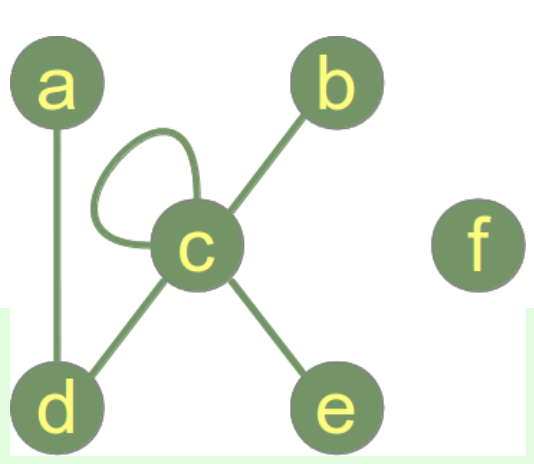

In [8]:
from IPython.display import Image
Image('/Users/sriramreddy/Desktop/Graph.png',width=250, height=250)

In [10]:
g = { "a" : ["d","e"],
      "b" : ["c","d"],
      "c" : ["b", "c", "d", "e"], # you can removing cycle for c
      "d" : ["a", "c","b"],
      "e" : ["c","a"], #
      "f" : [] #Different connected component
}
graph = Graph(g)
print("Vertices of graph:")
print(graph.vertices())

print("Edges of graph:")
print(graph.edges())

Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f']
Edges of graph:
[{'d', 'a'}, {'e', 'a'}, {'c', 'b'}, {'b', 'd'}, {'c'}, {'c', 'd'}, {'c', 'e'}]


In [12]:
#Its better to implement the adjacency list using sets.
#it will be faster if we are using set union operation.
#To transform change append operations to add 

In [68]:
""" A Python Class
A simple Python graph class, demonstrating the essential 
facts and functionalities of graphs.
"""
class Graph(object):
    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self.__graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = set([])

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].add(vertex2)
        else:
            self.__graph_dict[vertex1] = set([vertex2])

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res


if __name__ == "__main__":

    g = { "a" : set(["d"]),
          "b" : set(["c"]),
          "c" : set(["b", "c", "d", "e"]),
          "d" : set(["a", "c"]),
          "e" : set(["c"]),
          "f" : set([])
        }
    graph = Graph(g)
    print("Vertices of graph:")
    print(graph.vertices())

    print("Edges of graph:")
    print(graph.edges())

    print("Add vertex:")
    graph.add_vertex("z")

    print("Vertices of graph:")
    print(graph.vertices())
 
    print("Add an edge:")
    graph.add_edge({"a","z"})
    
    print("Vertices of graph:")
    print(graph.vertices())

    print("Edges of graph:")
    print(graph.edges())

    print('Adding an edge {"x","y"} with new vertices:')
    graph.add_edge({"x","y"})
    print("Vertices of graph:")
    print(graph.vertices())
    print("Edges of graph:")
    print(graph.edges())

Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f']
Edges of graph:
[{'d', 'a'}, {'c', 'b'}, {'c'}, {'c', 'e'}, {'c', 'd'}]
Add vertex:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z']
Add an edge:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z']
Edges of graph:
[{'d', 'a'}, {'c', 'b'}, {'c'}, {'c', 'e'}, {'c', 'd'}, {'z', 'a'}]
Adding an edge {"x","y"} with new vertices:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z', 'x']
Edges of graph:
[{'d', 'a'}, {'c', 'b'}, {'c'}, {'c', 'e'}, {'c', 'd'}, {'z', 'a'}, {'x', 'y'}]


In [ ]:
#DFS
# sometimes what we want is to append all the elements contained in the list rather the list itself. 
# You can do that manually of course, but a better solution is to use extend() as follows

In [48]:
g = { "a" : set(["d","e"]),
      "b" : set(["c","d"]),
      "c" : set(["b", "d", "e"]), # you can removing cycle for c
      "d" : set(["a", "c","b"]),
      "e" : set(["c","a"]), #
      "f" : set([]) #Different connected component
}
graph=Graph(g)
def dfs(graph, start):
    visited, stack,res = set(), [start],[]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            res.append(vertex)
            stack.extend(graph[vertex] - visited)
    return res
print(dfs(graph._Graph__graph_dict,'b'))
#The above one is recursive.

res = []
def dfs_rec(graph, start, res=[]):
#     if res is None:
#         res=[]
    res+=[start]
#     .append(start)
#     visited.add(start)
    for next in (graph[start]):
        if next not in res:
            res=dfs_rec(graph,next,res)
    return res

print(dfs_rec(graph._Graph__graph_dict,'b'))
#
#What is the stopping condition?
#Since it is a set , order is not proper. I have changed the return type to list

['b', 'd', 'a', 'e', 'c']
['b', 'c', 'e', 'a', 'd']


[['a', 'd', 'b'],
 ['a', 'd', 'c', 'b'],
 ['a', 'e', 'c', 'b'],
 ['a', 'e', 'c', 'd', 'b']]

In [53]:
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

#dfs_paths gives teh generator object. 
print(list(dfs_paths(graph._Graph__graph_dict, 'a', 'b')))

[['a', 'd', 'b'], ['a', 'd', 'c', 'b'], ['a', 'e', 'c', 'b'], ['a', 'e', 'c', 'd', 'b']]


In [57]:
def dfs_path(graph, start, goal):
    stack=[(start,[start])]
    while(stack):
        (vertex,path)=stack.pop()
        for next in graph[vertex]- set(path):
            if next==goal:
                yield path+[next]
            else:
                stack.append((next, path+[next]))
list(dfs_path(graph._Graph__graph_dict, 'a', 'b'))

[['a', 'd', 'b'],
 ['a', 'd', 'c', 'b'],
 ['a', 'e', 'c', 'b'],
 ['a', 'e', 'c', 'd', 'b']]

In [30]:
#dir(graph)----->attributes of the graph

In [62]:
#Single pair shortest path BFS
from collections import deque
def bfs_paths(graph, start, goal):
    queue=deque([(start,[start])])
    #queue=[(start,[start])]
    while(queue):
        (vertex,path)=queue.popleft()
        for next in graph[vertex]- set(path):
            if next==goal:
                yield path+[next]
            else:
                queue.append((next, path+[next]))
list(bfs_paths(graph._Graph__graph_dict, 'a', 'b'))


[['a', 'd', 'b'],
 ['a', 'e', 'c', 'b'],
 ['a', 'd', 'c', 'b'],
 ['a', 'e', 'c', 'd', 'b']]

In [67]:
g = { "a" : set(["e"]),
      "b" : set(["c","d","e"]),
      "c" : set(["b", "d", "e"]), # you can removing cycle for c
      "d" : set(["c","b"]),
      "e" : set(["c","a","b"]), #
      "f" : set([]) #Different connected component
}
graph=Graph(g)
from collections import deque
def single_short(graph, start, goal):
    queue=deque([(start,[start])])
    #queue=[(start,[start])]
    while(queue):
        (vertex,path)=queue.popleft()
        for next in graph[vertex]- set(path):
            if next==goal:
                return path+[next]
            else:
                queue.append((next, path+[next]))
print(list(single_short(graph._Graph__graph_dict, 'a', 'b')))

['a', 'e', 'b']


In [66]:
g = { "a" : set(["e",'d']),
      "b" : set(["c","d","e"]),
      "c" : set(["b", "d", "e"]), # you can removing cycle for c
      "d" : set(["c","b",'a']),
      "e" : set(["c","a","b"]), #
      "f" : set([]) #Different connected component
}
graph=Graph(g)
from collections import deque
def single_short(graph, start, goal):
    queue=deque([(start,[start])])
    #queue=[(start,[start])]
    while(queue):
        (vertex,path)=queue.popleft()
        for next in graph[vertex]- set(path):
            if next==goal:
                yield path+[next]
            else:
                queue.append((next, path+[next]))
print(list(single_short(graph._Graph__graph_dict, 'a', 'b')))

[['a', 'e', 'b'], ['a', 'd', 'b'], ['a', 'e', 'c', 'b'], ['a', 'd', 'c', 'b'], ['a', 'e', 'c', 'd', 'b'], ['a', 'd', 'c', 'e', 'b']]


Applications of BFS:
    
    1.Finding all connected components in a graph
    
    2.Finding the shortest path 
    
    3.Testing a graph for bipartiteness.


simple algorithm to find out whether a given graph is Birpartite or not using Breadth First Search (BFS).
1. Assign RED color to the source vertex (putting into set U).
2. Color all the neighbors with BLUE color (putting into set V).
3. Color all neighbor’s neighbor with RED color (putting into set U).
4. This way, assign color to all vertices such that it satisfies all the constraints of m way coloring problem where m = 2.
5. While assigning colors, if we find a neighbor which is colored with same color as current vertex, then the graph cannot be colored with 2 vertices (or graph is not Bipartite)

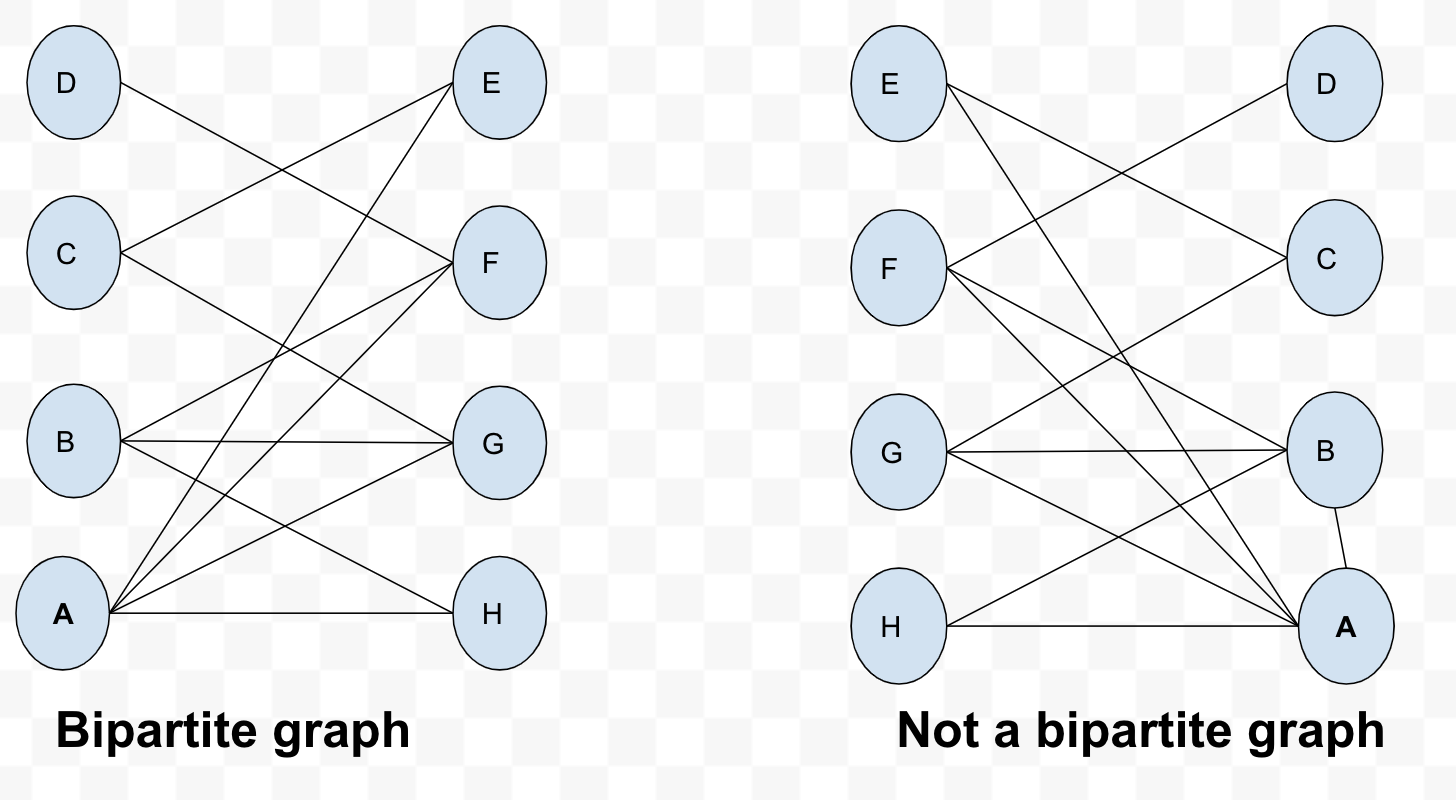

In [69]:
from IPython.display import Image
Image('/Users/sriramreddy/Desktop/Bipartite.png',width=250, height=250)

In [74]:
g = { "a" : set(["d","e"]),
      "b" : set(["c","d"]),
      "c" : set(["b", "d", "e"]), # you can removing cycle for c
      "d" : set(["a", "c","b"]),
      "e" : set(["c","a"]), #
      "f" : set([]) #Different connected component
}
graph=Graph(g)
from collections import defaultdict
def bfs(graph, start):
    visited, queue,res = set(), [start],[]
#     hmap = defaultdict(-1)
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            res.append(vertex)
            queue.extend(graph[vertex] - visited)
    return res
print(bfs(graph._Graph__graph_dict,'b'))

['b', 'c', 'd', 'e', 'a']


# Topological sort
Get the indegree for all 
append the queue only if the degree is of 0
res.append(queue popped value)




Other way to implement the topological sort

1) Maintain a visited set and stack 

2) Start with any vertex and check if there are any edges being unexplored from that vertex. 

3) If a vertex is totally explored, i.e no child to explore, add it to the stack

4) Repeat the process for other unexplored eddges.

In [5]:
# A Python program to print topological sorting of a graph 
# using indegrees 
from collections import defaultdict
#Class to represent a graph 
class Graph: 
    def __init__(self,vertices): 
        self.graph = defaultdict(list) #dictionary containing adjacency List 
        self.V = vertices #No. of vertices 
        
    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
    # The function to do Topological Sort.  
    def topologicalSort(self): 
          
        # Create a vector to store indegrees of all 
        # vertices. Initialize all indegrees as 0. 
        in_degree = [0]*(self.V) 
          
        # Traverse adjacency lists to fill indegrees of 
           # vertices.  This step takes O(V+E) time 
        for i in self.graph: 
            for j in self.graph[i]: 
                in_degree[j] += 1
  
        # Create an queue and enqueue all vertices with 
        # indegree 0 
        queue = [] 
        for i in range(self.V): 
            if in_degree[i] == 0: 
                queue.append(i) 
  
        #Initialize count of visited vertices 
        cnt = 0
  
        # Create a vector to store result (A topological 
        # ordering of the vertices) 
        top_order = [] 
  
        # One by one dequeue vertices from queue and enqueue 
        # adjacents if indegree of adjacent becomes 0 
        while queue: 
  
            # Extract front of queue (or perform dequeue) 
            # and add it to topological order 
            u = queue.pop(0) 
            top_order.append(u) 
  
            # Iterate through all neighbouring nodes 
            # of dequeued node u and decrease their in-degree 
            # by 1 
            for i in self.graph[u]: 
                in_degree[i] -= 1
                # If in-degree becomes zero, add it to queue 
                if in_degree[i] == 0: 
                    queue.append(i) 
  
            cnt += 1
  
        # Check if there was a cycle 
        if cnt != self.V: 
            print("There exists a cycle in the graph")
        else : 
            #Print topological order 
            print(top_order)
  
g = Graph(6) 
g.addEdge(5, 2); 
g.addEdge(5, 0); 
g.addEdge(4, 0); 
g.addEdge(4, 1); 
g.addEdge(2, 3); 
g.addEdge(3, 1); 
  
print("Following is a Topological Sort of the given graph")
g.topologicalSort() 

Following is a Topological Sort of the given graph
[4, 5, 2, 0, 3, 1]


In [ ]:
There is one more way, where you can get the topological sort

# Detecting a cycle

It can be many ways.

1) One way is to use the above topological sort. 

2) Disjoint sets data structure union, find, makeset 

3) Using DFS by remembering the parent node and maintaining a visited set of vertices


# Validating a graph Cycle checking through dfs

In [ ]:
#Let's say if some one has given you edges. 
dic = collections.defaultdict(set())
for i,j in edges:
    dic[i].add(j)
    dic[j].add(i)

stack = [dic.keys()[0]]

visited = set()
while(stack):
    node = stack.pop()
    if node in visisted:
        return False
    visited.add(node)
    for nei in dic[node]:
        stack.append(nei)
        dic[nei].remove(node)
        #This is ensuring that removing the parent of the node as it is coming through that parent
    dic.pop(node)
    # This is ensuring that removing that node from the dictionary as it is visited
return not dic

In [ ]:
# Python Program for union-find algorithm to detect cycle in a undirected graph 
# we have one egde for any two vertex i.e 1-2 is either 1-2 or 2-1 but not both 
#Following is the code for finding a cycle using Disjoint set
# Example given by Tushar roy is pretty clear
from collections import defaultdict 

#This class represents a undirected graph using adjacency list representation 
class Graph:
	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 

	# A utility function to find the subset of an element i 
	def find_parent(self, parent,i): 
		if parent[i] == -1: 
			return i 
		if parent[i]!= -1: 
			return self.find_parent(parent,parent[i]) 

	# A utility function to do union of two subsets 
	def union(self,parent,x,y): 
		x_set = self.find_parent(parent, x) 
		y_set = self.find_parent(parent, y) 
		parent[x_set] = y_set 



	# The main function to check whether a given graph 
	# contains cycle or not 
	def isCyclic(self): 
		# Allocate memory for creating V subsets and 
		# Initialize all subsets as single element sets 
		parent = [-1]*(self.V) 
		# Iterate through all edges of graph, find subset of both 
		# vertices of every edge, if both subsets are same, then 
		# there is cycle in graph. 
		for i in self.graph: 
			for j in self.graph[i]: 
				x = self.find_parent(parent, i) 
				y = self.find_parent(parent, j) 
				if x == y: 
					return True
				self.union(parent,x,y) 


# Create a graph given in the above diagram 
g = Graph(3) 
g.addEdge(0, 1) 
g.addEdge(1, 2) 
g.addEdge(2, 0) 

if g.isCyclic(): 
	print "Graph contains cycle"
else : 
	print "Graph does not contain cycle "
#This code is contributed by Neelam Yadav

# Djikstra algorithm for shortest path with edge weights O(|Elogv|)

In [75]:
from collections import deque, namedtuple
# we'll use infinity as a default distance to nodes.
inf = float('inf')
Edge = namedtuple('Edge', 'start, end, cost')
def make_edge(start, end, cost=1):
  return Edge(start, end, cost)


class Graph:
    def __init__(self, edges):
        # let's check that the data is right
        wrong_edges = [i for i in edges if len(i) not in [2, 3]]
        if wrong_edges:
            raise ValueError('Wrong edges data: {}'.format(wrong_edges))

        self.edges = [make_edge(*edge) for edge in edges]

    @property
    def vertices(self):
        return set(
            sum(
                ([edge.start, edge.end] for edge in self.edges), []
            )
        )

    def get_node_pairs(self, n1, n2, both_ends=True):
        if both_ends:
            node_pairs = [[n1, n2], [n2, n1]]
        else:
            node_pairs = [[n1, n2]]
        return node_pairs

    def remove_edge(self, n1, n2, both_ends=True):
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        edges = self.edges[:]
        for edge in edges:
            if [edge.start, edge.end] in node_pairs:
                self.edges.remove(edge)

    def add_edge(self, n1, n2, cost=1, both_ends=True):
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        for edge in self.edges:
            if [edge.start, edge.end] in node_pairs:
                return ValueError('Edge {} {} already exists'.format(n1, n2))

        self.edges.append(Edge(start=n1, end=n2, cost=cost))
        if both_ends:
            self.edges.append(Edge(start=n2, end=n1, cost=cost))

    @property
    def neighbours(self):
        neighbours = {vertex: set() for vertex in self.vertices}
        for edge in self.edges:
            neighbours[edge.start].add((edge.end, edge.cost))

        return neighbours

    def dijkstra(self, source, dest):
        assert source in self.vertices, 'Such source node doesn\'t exist'
        distances = {vertex: inf for vertex in self.vertices}
        previous_vertices = {
            vertex: None for vertex in self.vertices
        }
        distances[source] = 0
        vertices = self.vertices.copy()

        while vertices:
            current_vertex = min(
                vertices, key=lambda vertex: distances[vertex])
            vertices.remove(current_vertex)
            if distances[current_vertex] == inf:
                break
            #Till this point, I understood. 
            
            for neighbour, cost in self.neighbours[current_vertex]:
                alternative_route = distances[current_vertex] + cost
                #What ever the cost which you are getting to the different neighbour, 
                #
                #
                if alternative_route < distances[neighbour]:
                    distances[neighbour] = alternative_route
                    
                    previous_vertices[neighbour] = current_vertex
                    # I understood this.
# O(|Elogv|)
        path, current_vertex = deque(), dest
        while previous_vertices[current_vertex] is not None:
            path.appendleft(current_vertex)
            current_vertex = previous_vertices[current_vertex]
        if path:
            path.appendleft(current_vertex)
        return path

graph = Graph([
    ("a", "b", 7),  ("a", "c", 9),  ("a", "f", 14), ("b", "c", 10),
    ("b", "d", 15), ("c", "d", 11), ("c", "f", 2),  ("d", "e", 6),
    ("e", "f", 9)])

print(graph.dijkstra("a", "e"))

deque(['a', 'c', 'd', 'e'])


# All pair shortest path

1). Run Dijkstra algorithm on all vertices

2). Bellman Ford algorithms

In [ ]:
#Topological sort
#All pair shortest path ---- Floyd warshall algorithm
# binary search 
# It returns location of x in given array arr  
# if present, else returns -1 
    def binarySearch(arr, l, r, x): 
        while l <= r: 
            mid = l + (r - l)/2; 
            # Check if x is present at mid 
            if arr[mid] == x: 
                return mid
            # If x is greater, ignore left half 
            elif arr[mid] < x: 
                l = mid + 1
            # If x is smaller, ignore right half 
            else: 
                r = mid - 1
        # If we reach here, then the element 
        # was not present 
        return -1


# Median of input stream

In [ ]:
from heapq import *
class MedianFinder(object):
    def __init__(self):
        """
        initialize your data structure here
        idea is to hold two heaps one min heap and max heap
        """
        self.heaps=[],[]
    def addNum(self, num):
        """
        :type num: int
        :rtype: None
        """
        small,large=self.heaps
        heappush(small, -heappushpop(large, num))
        if len(large) < len(small):
            heappush(large,-heappop(small))

    def findMedian(self):
        """
        :rtype: float
        """
        small,large=self.heaps
        #I never knew that this act as pointer in python.
        if len(large) > len(small):
            return large[0]
        return (large[0]-small[0])/2.0

# Binary search for 2D array

In [ ]:


def bins(self, mat, start, vertical, target):
    low=0
    if not vertical:
        high = len(mat[0])-1  
    else:
        high = len(mat)-1
    while (low <= high):
        mid = (low + high)//2
        
        if vertical:
            if mat[mid][start] < target:
                high=mid-1
            elif mat[mid][start] < target:
                low=mid+1
            else:
                return True
        else:
            if mat[start][mid] < target:
                high=mid-1
            elif mat[start][mid] < target:
                low=mid+1
            else:
                return True
    return False

def real(mat, target):
    
    
    
    for i in range( min (len(mat), len(mat[0]))):
        vertical=self.bins(mat, i, True, target)
        horizontal=self.bins(mat, i, False, target)
        if vertical or horizontal:
            return True
    return False
        


#This is kind of doable.
Testing a graph whether it is bipartite or not. 
Start with a node, mark all the neighbors with the opposite color of current

In [ ]:
# Minimum Spanning Tree
# Kruskal algorithm ---- use Union Find 
#instead of using queue from collections you can simply use pop(0) rather than importing. 

Merge Intervals

In [ ]:
k=len(intervals)
        if k<=1:
            return intervals
        intervals.sort(key=lambda x:x.start)
        a=intervals[0]
        i=0
        res=[]
        # print(a.start,a.end)
        while(i<k):
            b=intervals[i]
            if a.end >= b.start:
                a=Interval(a.start,max(a.end,b.end))
            else:
                res.append(a)
                a=intervals[i]
            i=i+1
        if a.end >= b.start:
            res.append(Interval(a.start,max(a.end,b.end)))
        else:
            res.append(b)
        return res

# Symmetric in Tree

In [ ]:
    def isSymmetric(self, root):
        if root==None:
            return True
        else:
            return self.mir(root.left, root.right)
    def mir(self, left, right):
        if left==None and right==None:
            return True
        if  left==None or right==None:
            return False
        if left.val == right.val:
            outpair=self.mir(left.left, right.right)
            inpair=self.mir(left.right, right.left)
            return outpair and inpair
        else:
            return False
        
#Iterative approach is below        
        
    def isSymmetric(self, root):
        '''
        Recursive approach is above
        '''
        if root is None:
            return True
        stack=[(root.left, root.right)]
        while(stack):
            e=stack.pop(0)
            l=e[0]
            r=e[1]
            if (l is None) and (r is None):
                continue
            if (l is None) or (r is None):
                return False
            if (l.val == r.val):
                stack.append((l.left, r.right))
                stack.append((l.right, r.left))
            else:
                return False
        return True

Word Ladder

In [ ]:
        def build(wordList):
            d=collections.defaultdict(list)
            for w in wordList:
                for i in range(len(wordList[0])):
                    s=w[:i]+"_"+w[i+1:]
                    d[s]+=[w]
            return d
        d=build(wordList)
        l=1
        q=deque([[beginWord,l]])
        L=len(beginWord)
        while (q):
            [word,l]=q.popleft()
            if word==endWord:
                return l
            for i in range(L):
                new=word[:i]+"_"+word[i+1:]
                if new in d:
                    for kill in d[new]:
                        q.append([kill,l+1])
                    del d[new]
        return 0
    
    ###
        wordList=set(wordList)
        l=1
        q=deque([[beginWord,l]])
        L=len(beginWord)
        while (q):
            [word,l]=q.popleft()
            if word==endWord:
                return l
            for i in range(L):
                for c in 'abcdefghijklmnopqrstuvwxyz':
                    new=word[:i]+c+word[i+1:]
                    if new in wordList:
                        wordList.remove(new)
                        q.append([new,l+1])
        return 0

Number of Islands 
DFS, BFS, Union Find

In [ ]:
        def sink(i,j):
            if 0<=i<len(grid) and 0<=j<len(grid[i]) and grid[i][j]=='1':
                grid[i][j]='0'
                map(sink, (i,i,i+1,i-1), (j+1,j-1,j,j) ) 
                return 1
            return 0
        return sum(sink(i,j) for i in range(len(grid)) for j in range(len(grid[0])))

In [ ]:
#If you wish to implement in iterative, use stack and get it done.
    if not grid:
        return 0        
    m = len(grid)
    n = len(grid[0])
    sum  = 0    
    for i in range(m):
        for j in range(n):            
            if grid[i][j] == "0":
                continue
            else:
                  #sum up only once per chance of meeting "1"
                sum += 1
                stack = list()
                stack.append([i,j])               
                #visit each "1" in the adjacent area using a stack
                while len(stack) != 0:
                    [p,q] = stack.pop()
                    if p >= 1 and grid[p-1][q] == "1":
                        stack.append([p-1,q])
                    if p < m -1 and grid[p+1][q] == "1":
                        stack.append([p+1,q])
                    if q >= 1 and grid[p][q-1] == "1":
                        stack.append([p,q-1])
                    if q < n - 1 and grid[p][q + 1] == "1":
                        stack.append([p,q+1])
                    #mark as visited
                    grid[p][q] = "0"
    return sum

# Number of Islands

In [ ]:
class Solution(object):
    def bfs(self, grid, i, j):
        queue=collections.deque([(i,j)])
        directions=[(0,1),(1,0),(-1,0),(0,-1)]
        while(queue):
            (r,c)=queue.popleft()
            grid[r][c]='0'
            for (i,j) in directions:
                nr=r+i
                nc=c+j
                if 0<=nr<len(grid) and 0<=nc<len(grid[0]) and grid[nr][nc]=='1':
                    queue.append((nr,nc))
                    grid[nr][nc]='0'
                    #You can tell others 
                
    def numIslands(self, grid):
        if not grid or not grid[0]:
            return 0
        count=0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j]=='1':
                    self.bfs(grid,i,j)
                    count+=1
        return count

In [ ]:
#Union Find
class UnionFind(object):
    def __init__(self, grid):
        m, n = len(grid), len(grid[0])
        self.count = 0
        self.parent = [-1] * (m*n)
        self.rank = [0] * (m*n)
        for i in xrange(m):
            for j in xrange(n):
                if grid[i][j] == '1':
                    self.parent[i*n + j] = i*n + j
                    self.count += 1
#core of the union find
#x.par=x
#if x.par != x: x.par=find(x.par) 
#return x.par ------ path compression logic
    def find(self, i):
        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

#count is the variable which is used to get the best out of the things.
    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if rootx != rooty:
            if self.rank[rootx] > self.rank[rooty]:
                self.parent[rooty] = rootx
            elif self.rank[rootx] < self.rank[rooty]:
                self.parent[rootx] = rooty
            else:
                self.parent[rooty] = rootx
                self.rank[rootx] += 1
            self.count -= 1

class Solution(object):
    def is_valid(self, grid, r, c):
        m, n = len(grid), len(grid[0])
        if r < 0 or c < 0 or r >= m or c >= n:
            return False
        return True

    def numIslands(self, grid):
        """
        :type grid: List[List[str]]
        :rtype: int
        """
        if not grid or not grid[0]:
            return 0

        uf = UnionFind(grid)

        directions = [(0,1), (0,-1), (-1,0), (1,0)]
        m, n = len(grid), len(grid[0])
        for i in xrange(m):
            for j in xrange(n):
                if grid[i][j] == '1':
                    for d in directions:
                        nr, nc = i + d[0], j + d[1]
                        if self.is_valid(grid, nr, nc) and grid[nr][nc] == '1':
                            uf.union(i*n+j, nr*n+nc)
        return uf.count

# Word Search

In [ ]:
class Solution(object):
    def dfs(self, board, word,i,j):
        if not word:
            return False
        if not board:
            return False
        if i<0 or i>=len(board) or j<0 or j>=len(board[0]) or board[i][j]!=word[0]:
            return False
        #This means that the first word is matching.
        if board[i][j]==word:
            return True
        tmp=board[i][j]
        board[i][j]='#' 
        #just to mark that this node is visited. 
        if  self.dfs(board, word[1:], i+1,j) or self.dfs(board, word[1:], i-1,j) or self.dfs(board, word[1:], i,j+1) or self.dfs(board, word[1:], i,j-1):
            return True
        board[i][j]=tmp    
        return False
    def exist(self, board, word):
        """
        :type board: List[List[str]]
        :type word: str
        :rtype: bool
        """
        k=len(board)
        l=len(board[0])
        for i in range(k):
            for j in range(l):
                if self.dfs(board, word, i, j):
                    return True
        return False

# Word Search II

In [ ]:
#If they wish to increase the complexity
# https://towardsdatascience.com/implementing-a-trie-data-structure-in-python-in-less-than-100-lines-of-code-a877ea23c1a1
#This is one of the best data structure usage.TRIE and DFS
class TrieNode():
    def __init__(self):
        self.children = collections.defaultdict(TrieNode)
        self.isWord = False
    
class Trie():
    def __init__(self):
        self.root = TrieNode()
    def insert(self, word):
        node = self.root
        for w in word:
            node = node.children[w]
            #Every time I'm updating the node as well. So, go ahead
        node.isWord = True
    def search(self, word):
        node = self.root
        for w in word:
            node = node.children.get(w)
            if not node:
                return False
        return node.isWord

class Solution(object):
    def findWords(self, board, words):
        res = []
        trie = Trie()
        node = trie.root
        for w in words:
            trie.insert(w)
        for i in xrange(len(board)):
            for j in xrange(len(board[0])):
                self.dfs(board, node, i, j, "", res)
        return res  
    
    def dfs(self, board, node, i, j, path, res):
#         If node.isword -- append
        if node.isWord:
            res.append(path)
            node.isWord = False
        if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]):
            return 
        tmp = board[i][j]
        node = node.children.get(tmp)
        if not node:
            return 
        board[i][j] = "#"
        self.dfs(board, node, i+1, j, path+tmp, res)
        self.dfs(board, node, i-1, j, path+tmp, res)
        self.dfs(board, node, i, j-1, path+tmp, res)
        self.dfs(board, node, i, j+1, path+tmp, res)
        board[i][j] = tmp

In [ ]:
Word Break II

In [ ]:
Word Break can be donw using the DP
You have to give the list of the words.



In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None


#Reversing the linked list

    def rev(self,head):
        if not head:
            return None
        if head.next==None:
            return head
        prev=None
        temp=head
        while(head):
            t=head.next
            head.next=prev
            prev=head
            head = t
        return prev

# Convert sorted Linked List to BST array

In [70]:
Append this thing into an array,
    def sortedListToBST(self, head):
        ls = []
        while head:
            ls.append(head.val)
            head = head.next
        return self.helper(ls, 0, len(ls)-1)

    def helper(self, ls, start, end):
        if start > end:
            return None
        if start == end:
            return TreeNode(ls[start])
        mid = (start+end) >> 1
        root = TreeNode(ls[mid])
        root.left = self.helper(ls, start, mid-1)
        root.right = self.helper(ls, mid+1, end)
        return root

SyntaxError: invalid syntax (<ipython-input-70-760f1ef03cdc>, line 1)

In [ ]:
# Buy stock
        m=0
        for i in range(1,len(prices)):
            if prices[i] > prices[i-1]:
                m+=prices[i]- prices[i-1]
        return m
        
        #Analysis using while loop
        
#Peak-Valley method
        k=len(prices)
        pro=0
        i=0
        while(i<k):
            while(i<k-1 and prices[i]>=prices[i+1]):
                i+=1
            valley=prices[i]
            while(i<k-1 and prices[i]<=prices[i+1]):
                i+=1
            peak=prices[i]
            pro+=peak-valley
            i+=1
        return pro

In [ ]:
from collections import defaultdict
class Node:
    def __init__(self,key,val):
        self.key=key
        self.val=val
        self.prev=None
        self.next=None
# The above is a linked list of node

class LRUCache(object):
    def __init__(self, capacity):
        """
        :type capacity: int
How to maintain the least recent used?
get can be done in O(1) using hash map
what about put as 
If it has reached the capacity, it need to expel the least 
The logic is you can remove the node from the linked list and then add the node at the end of the doubly linked list. 
        """
        self.capacity=capacity
        self.dict=defaultdict(int)
        self.head=Node(0,0)
        self.tail=Node(0,0)
        self.head.next=self.tail
        self.tail.prev=self.head
        self.count=0

    def get(self, key):
        """
        :type key: int
        :rtype: int
        self.dict[]
        """
        # print("entering get")
        if key in self.dict.keys():
            # print("entering get key")
            node=self.dict[key]
            self._remove(node)
            self._add(node)
            return node.val
        return -1
    
    def put(self, key, value):
        """
        :type key: int
        :type value: int
        :rtype: void
        If it has exceeding the capacity:
        else:
        can it happen with the same key
        """
        if key in self.dict:
            self._remove(self.dict[key])
        n=Node(key,value)
        self._add(n)
        #dictionary key ------> value is the node
        self.dict[key]=n
        
        #If it is exceeding the capacity, then you are removing the key from the dictionary 
#         as well as the 
        if len(self.dict.keys()) > self.capacity:
            p=self.head.next
            del self.dict[p.key]
            self._remove(p)   

    def _remove(self,node):
        self.count-=1# just check this part
        # print("hi in rem",self.count)
        p=node.prev
        n=node.next
        p.next=n
        n.prev=p
    
    def _add(self,node):
        self.count+=1
        # print("hi in add",self.count)
        p=self.tail.prev
        p.next=node
        self.tail.prev=node
        node.prev=p
        node.next=self.tail
# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)

In [ ]:
Number to words
# Given a Number, print it out in English words:

# 1203 = one thousand two hundred three
# 104 = one hundred four
# 12 = twelve
# 5 = five
# 19029911 = nineteen million twenty nine thousand nine hundred eleven
# Enter your code here. Read input from STDIN. Print output to STDOUT
# one=[""]
# 1203/1000----1
# 2400/1000----2
# two thousand 

# 400/100-----4
# four hundred

# 25203
# 1000
# 25---str
# twenty five thousan

# 203/100
# two hundred
# 3/10
# 3
# 125203/1000
# 125 one hundred twenty five thousand 
# 203

# 100000--1 lakh
list1=["","One","Two","Three"............"Nineteen"]
tens=["Twenty", "Thirty",.....,"Ninety"]

 19029911 = nineteen million twenty nine thousand nine hundred eleven
decimals
0
if (n<0):
    "minus"

billion=1000000000
def words(n):
    if n==0:
        return "Zero"
    # if n in hmap:
    #     return hmap[n]
    if n < 20:
        return list1[n]
    if n < 100: 
        return tens[n/10 - 2] + words(n%10)
    if n < 1000:
        return list1[n/100 - 1] + "hundred" + words(n%100)
    # if n < 10000:
    #     return list1[n/1000 - 1] + "thousand" + words(n%1000)
    if n < 1000000:
        return words(n/1000)  + "thousand" + words(n%1000)
    if n > 1000000 and n < billion:
        return words(n/1000000) + "million" + words(n%1000000)
    if n > billion:
        return words(n/billion) + "billion" + words(n%billion)
        
    # list2=["Thousand","Million", "billion"]
    # for i in list2:
    #     if n < 1000**(i+1)
    #       This can be used for the automation of the initial part to get the initial part instead of going for zillion billion and other.
    # 10000
    
        



# Deserialisation or Serialisation of BT 
Helper functions as it needs recursion for the deserialisation as you need to connect the Tree Node

In [ ]:
    def serialize(self, root):
        """Encodes a tree to a single string.
        :type root: TreeNode
        :rtype: str
        #Perform a pre order traversal for serialization
        
        res=[]
        if root==None:
            return res
        stack=[root]
        res.append(root)
        while(stack):
            node=stack.pop()
            if node.left:
                stack.append(node.left)
                res.append(node.left)
            else:
                res.append(None)
            if node.right:
                res.append(node.right)
                stack.append(node.right)
            else:
                res.append(None)
        while(res[-1]==None):
            res.pop()
        return str(res)
        """
        
        def helper(root,string):
            
            if root==None:
                string+="None,"
            else:
                string+=str(root.val)+","
                string = helper(root.left, string)
                string = helper(root.right, string)
            return string
        return helper(root, "")
            
    def deserialize(self, data):
        """Decodes your encoded data to tree.
        :type data: str
        :rtype: TreeNode
        #Perform a pre order traversal for serialization
        """
        list= data.split(",")
        def helper2(list):
            if list==None:
                return 
            
            if list[0]=='None':
                list.pop(0)
                return None
            root=TreeNode(list[0])
            list.pop(0)
            root.left=helper2(list)
            #At any point of time, I'm doing pop. So, list is sufficient
            root.right=helper2(list)
            return root
        
        return helper2(list)

# Inorder successor as you dont have information

In [ ]:
        #In order successor
        stack, res = [], []
        while True:
            while root:
                stack.append(root)
                root = root.left
            if not stack:
                return 
            node = stack.pop()
            res.append(node)
            if len(res) > 1 and res[-2] == p:
                return res[-1]
            root = node.right
        
        #Merging the binary tree
        if (t1 == None):
            return t2
        if (t2 == None):
            return t1
        t1.val += t2.val
        t1.left = self.mergeTrees(t1.left, t2.left)
        t1.right = self.mergeTrees(t1.right, t2.right)
        return t1

In [ ]:
Constructing Binary Tree: This has been haunting
        ls = []
        while head:
            ls.append(head.val)
            head = head.next
        return self.helper(ls, 0, len(ls)-1)

    def helper(self, ls, start, end):
        if start > end:
            return None
        if start == end:
            return TreeNode(ls[start])
        mid = (start+end) >> 1
        root = TreeNode(ls[mid])
        root.left = self.helper(ls, start, mid-1)
        root.right = self.helper(ls, mid+1, end)
        return root



# Find the kth largest number

In [ ]:
import heapq
import random
class Solution(object):
    def findKthLargest(self, A, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: int
        For the largest element, you should always use min heap 
        if the element coming > minimum element, then it will be popped out. 
        if len(nums) < k:
            return None
        list1=nums[:k]
#         like this I can perform copy as .copy() is removed in both python 2 and python 3
        # heapq._heapify_max(list1)
        heapq.heapify(list1)

        for i in range(k,len(nums)):
            heapq.heappushpop(list1, nums[i])
#             I'm pushing it properly and expecting it to pop
        return list1[0]    
        """
#         You can do this in O(n)
        k=len(A)-k
        #The following is the code for the Kth smallest element
        while(True):
            pivot=int(random.random() * (len(A)-1))
            # print(pivot)
            upper=[]
            lower=[]
            # a,b=upper.append, lower.append
            pivotcount=0
            for i in range(len(A)):
                if A[pivot] > A[i]:
                    lower.append(A[i])
                elif A[pivot] < A[i]:
                    upper.append(A[i])
                else:
                    pivotcount+=1
            # print(lower,upper)
            i,j= len(lower), len(upper)
            if k < i:
                A=lower
            elif k < i + pivotcount:
                return A[pivot]  
            else:
                A=upper
                k-=len(lower)+ pivotcount

In [71]:
# Lowest common ancestor of a binary tree

In [ ]:

        if root==None:
            return None
        parent={root:None}
        stack=[root]
#I'm keeping both of them in parents.
        while (p not in parent) or (q not in parent):
            node=stack.pop()
            if node.left:
                parent[node.left]=node
                stack.append(node.left)
                
            if node.right:
                parent[node.right]=node
                stack.append(node.right)
        ancestors=set()
        while(p):
            ancestors.add(p)
            p=parent[p]
        
        while q not in ancestors:
            q=parent[q]
        return q

In [ ]:
Lowest common ancestor of a BST

In [ ]:
Class BSTNode(object):
    def __init__(self,data):
        self.data =data
        self.right=None
        self.left=None

def LCA(self, root):
    if root.right and root.left:
        if root.val >= p.val and root.val <= q.val:
            return root
        elif root.val < p.val and root.val < q.val:
            return self.LCA(root.right)
        elif root.val > p.val and root.val > q.val:
            return self.LCA(root.left)

In [ ]:
Word Break -----> All the variants I have to check 
----------> BFS

In [ ]:

        k=len(s)
        dp=[False]*(k+1)
        dp[0]=True
        for i in range(k):
            if dp[i]:
                for j in range(i,k):
                    if s[i:j+1] in gmap:
                        dp[j+1]=True
        return dp[-1]